# Probability playground: Free throw probabilities in basketball

Premise: Given 5 basketball free throws and an 80% chance of a basket (B) each time you throw, what are the theoretical probabilities of making 0, 1, 2, 3, 4, and 5 shots in?

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

## Computing theoretical probability distribution

In [2]:
from math import factorial

pb = .5  # Probability of making a basket
pm = 1-pb  # Probability of a miss
N = 10
combs = {}
p_comb = {}
p_outcome = {}

In [3]:
def compute_combinations(n, r):  # Compute number of ways to make r baskets from n total shots (n choose r).
    return factorial(n) / (factorial(n-r) * factorial(r))

In [4]:
for i in range(N+1):
    combs[i] = compute_combinations(N, i)  # Make a dict with # combinations possible for each shot outcome

combs

{0: 1.0,
 1: 10.0,
 2: 45.0,
 3: 120.0,
 4: 210.0,
 5: 252.0,
 6: 210.0,
 7: 120.0,
 8: 45.0,
 9: 10.0,
 10: 1.0}

In [5]:
import math

print(sum(combs.values()))
math.log(sum(combs.values()), 2) == N  # Proves that the sum from i=0 to n of (n k) is 2**n.

1024.0


True

In [6]:
for i in range(N+1):
    p_comb[i] = (pm ** (N-i)) * (pb ** (i))  # Make a dict with probability of outcome for each combination event

In [7]:
for i in range(N+1):
    p_outcome[i] = combs[i] * p_comb[i]

In [8]:
data = {
    'combs' : list(combs.values()),
    'p_comb' : list(p_comb.values()),
    'p_outcome' : list(p_outcome.values())
}

In [9]:
df = pd.DataFrame(data)
#df['# combinations'] = combs.values()
#df['P of combination'] = p_comb.values()
#df['P of outcome'] = p_outcome.values()

df
sum(df['p_outcome'])  # Checking that this probability distribution sums to 1

,combs,p_comb,p_outcome
0,1.0,0.000977,0.000977
1,10.0,0.000977,0.009766
2,45.0,0.000977,0.043945
3,120.0,0.000977,0.117188
4,210.0,0.000977,0.205078
5,252.0,0.000977,0.246094
6,210.0,0.000977,0.205078
7,120.0,0.000977,0.117188
8,45.0,0.000977,0.043945
9,10.0,0.000977,0.009766


1.0

In [10]:
import ipywidgets as widgets

basketSlider = widgets.IntSlider(
    value=N,
    min=0,
    max=20.0,
    step=1,
    description='Baskets',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.1f',
)

ProbabilitySlider = widgets.FloatSlider(
    value=pb,
    min=0,
    max=1,
    step=0.1,
    description='P(B)',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.1f',
)

Text(0.5,1,'Probability of x shots made in 10 baskets')

Text(0.5,0,'Outcome')

Text(0,0.5,'Probability')

A Jupyter Widget

A Jupyter Widget

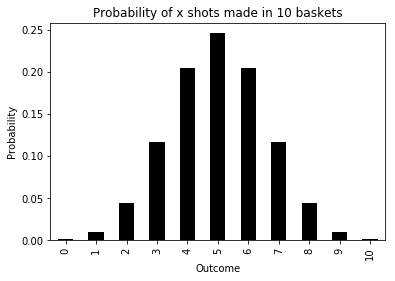

In [11]:
plot = df['p_outcome'].plot(kind='bar', colormap='gray', )
plot.set_title('Probability of x shots made in {} baskets'.format(N))
plot.set_xlabel('Outcome')
plot.set_ylabel('Probability')
basketSlider
ProbabilitySlider

## Simulating dice rolls

In [12]:
import matplotlib.pyplot as plt
import pandas as pd

In [13]:
p_k = 1/6  # Probability of getting k in n dice rolls
p_nk = 1 - p_k  # Probability of getting ~k in n dice rolls

In [14]:
a = 10 * np.random.randn(100) + 50  # Std of 10, mean of 50

Text(0.5,0,'Value')

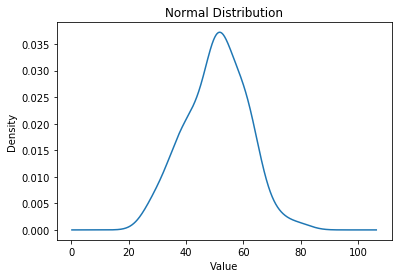

In [15]:
pd.Series(a).plot(kind='kde', title='Normal Distribution').set_xlabel('Value')  # Probability distribution

In [1]:
import numpy as np

In [7]:
a = np.array([1, 2, 3, 4])

In [8]:
a

array([1, 2, 3, 4])

In [11]:
a / 2

array([ 0.5,  1. ,  1.5,  2. ])